In [1]:
import os
import numpy as np
import pandas as pd 
from PIL import Image 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split

In [26]:
# Load the images and some metadata  
img_dir = 'dummy_data/'
img_w, img_h, img_ch = 1024, 1024, 3
num_imgs = len(os.listdir(img_dir))
img_files = sorted(os.listdir(img_dir)) # sort them so they're in the same order as the labels 
print(img_files[:10]) # print the first few to see if they look right 

['001-2002-1_1.jpg', '001-2002-1_2.jpg', '001-2002-1_3.jpg', '001-2002-1_4.jpg', '002-2002-1_1.jpg', '002-2002-1_2.jpg', '002-2002-1_3.jpg', '002-2002-1_4.jpg', '003-2002-1_1.jpg', '003-2002-1_2.jpg']


In [59]:
# Load the labels 
labels_dir = 'labels.csv'
labels_df = pd.read_csv(labels_dir, usecols=['Individual Patch', 'Binary Outcome'])
labels_df = labels_df.sort_values(by=['Individual Patch']) # sort them so they're in the same order as the images 
labels_df.head() # print the first few to see if they look right 

,Individual Patch,Binary Outcome
0,001-2002-1_1,0
1,001-2002-1_2,0
2,001-2002-1_3,0
3,001-2002-1_4,0
10,002-2002-1_1,0


In [52]:
labels_df

,Individual Patch,Binary Outcome
0,001-2002-1_1,0
1,001-2002-1_2,0
2,001-2002-1_3,0
3,001-2002-1_4,0
10,002-2002-1_1,0
11,002-2002-1_2,0
12,002-2002-1_3,0
13,002-2002-1_4,1
4,003-2002-1_1,0
5,003-2002-1_2,0


In [49]:
# Iterate over all the images in the directory and place them in a numpy array 
# with their corresponding labels 
imgs = np.zeros((img_w, img_h, img_ch, num_imgs))
labels = np.zeros(num_imgs)
for i, img_file in enumerate(img_files): 
    imgs[:,:,:,i] = np.asarray(Image.open(img_dir + img_file))
    labels[i] = labels_df['Binary Outcome'].iloc[i] 

1.0


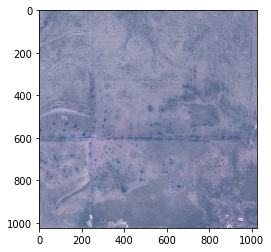

In [54]:
sample = 7
print(labels[sample])
plt.imshow(imgs[:,:,:,sample]) 

In [ ]:
# Perform data augmentations to increase the size of the dataset 
flip_ud = np.zeros(imgs.shape)
flip_lr = np.zeros(imgs.shape) 
rot90 = np.zeros(imgs.shape)
rot180 = np.zeros(imgs.shape)
rot270 = np.zeros(imgs.shape)

for i in range(num_imgs):
    original_img = imgs[:,:,:,i] 
    flip_ud[:,:,:,i] = np.flip(original_img, 0) # flip the image up-down
    flip_lr[:,:,:,i] = np.flip(original_img, 1) # flip the image left-right
    rot90[:,:,:,i] = np.rot90(original_img, 1) # rotate the image 90 degrees 
    rot180[:,:,:,i] = np.rot90(original_img, 2) # rotate the image 180 degrees 
    rot270[:,:,:,i] = np.rot90(original_img, 3) # rotate the image 270 degrees 
    
# Put them all together in one matrix 
aug_imgs = np.concatenate((imgs, flip_ud, flip_lr, rot90, rot180, rot270), axis=3)
aug_labels = np.tile(labels, 6) 

# Verify the shape of the resulting matrix 
print(aug_imgs.shape)
print(aug_labels.shape)

In [ ]:
# Split into training, validation, and test sets 
# Note: This will automatically shuffle the data before splitting it 
# Note: We have to switch the order of the dimensions of the images so scikit can split it properly 
# Here we are splitting 80% for training and 20% for testing 
imgs_train, imgs_test, labels_train, labels_test = train_test_split(np.rollaxis(aug_imgs, 3), aug_labels, test_size=0.20)  

In [ ]:
import tensorflow as tf 